Comentario acerca de las redes RNN. Los pesos y sesgos (weights and biases) son iguales en todos los estados
de tiempo $t=0,1,2, \cdots, T$. Solo cambian con cada
iteracion de gradiente (epoch).


Estas redes recursivas se usan para secuecias de palabras (o de sonidos, o de imagenes). Por ejemplo:

Herny pide **burritos** cada vez que va a al restaurante. A Henry le debe gustar mucho la cocina ??
??=**mexicana**.


# Redes: LSTM
Las redes LSTM fueron ivetadas por Hochreiter and Schmidhuber in 1997 (cita en las notas). Esto se basa en el concepto de **gates** (puertas).  Las **gates** importantes (hoy, por que el original ha sufrido variaciones).

* forget gate
* input gate
* output gate

El proposito de esto es derrotar el "vanishing/exploding" gradient problem.



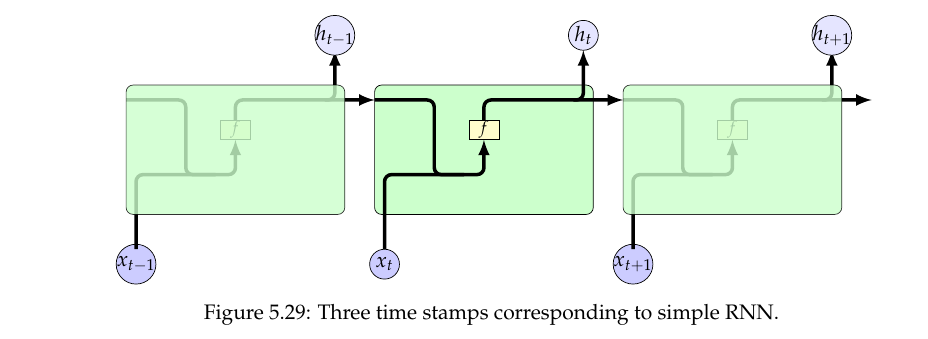

La Figura 5.29 es el **vanilla** RNN. No tienen ningun grado de sofisticacion.

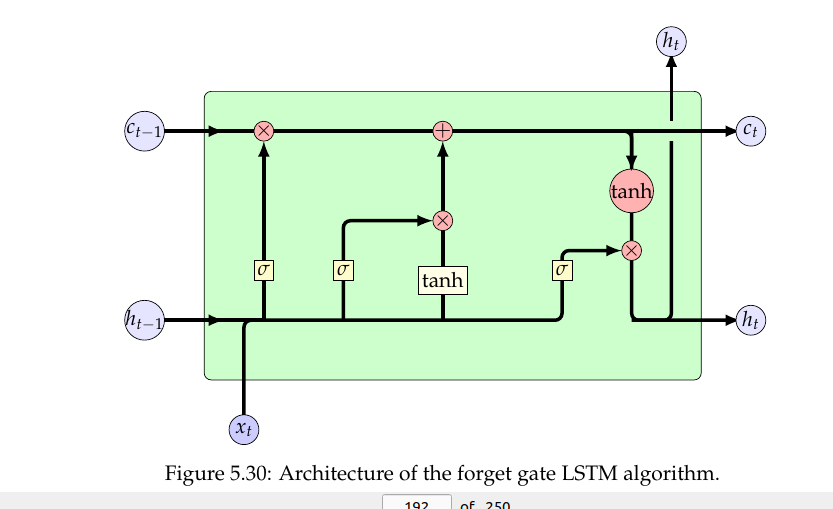

La figura 5.30 muestra la arquitectura de un nodo (una palabra en un frase) de LSTM. Para explicar esta arquitectura la dividimos en tres partes.


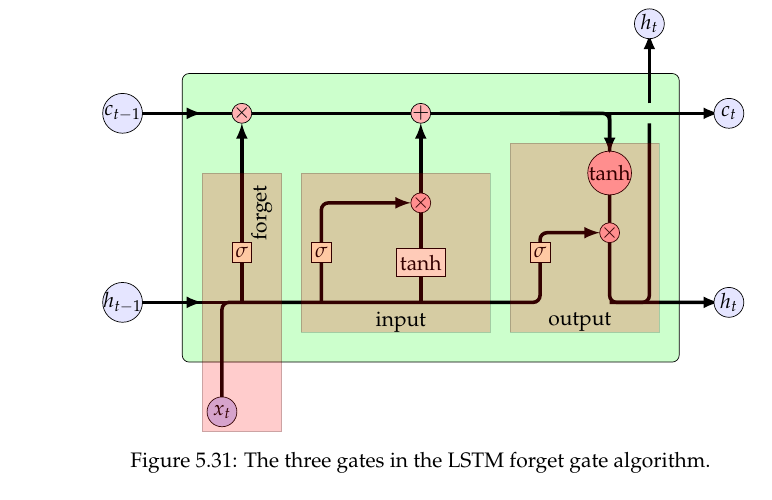

* **forget** gate:

$$f_t = \sigma(W_f x_t + U_f h_{t-1} + b_f) \tag{0} .$$
Estos vectores/matrices tienen que tener dimensiones consistentes. Por ejemplo
$x_t \in \mathbb{R}^d$, $h_{t-1} \in \mathbb{R}^h$, $W_f \in \mathbb{R}^{h \times d}$, $U_f \in \mathbb{R}^{h \times h}$, $b_f \in \mathbb{R}^h$, $f_t \in \mathbb{R}^h$.

* **input** gate:
$$i_t = \sigma(W_i x_t + U_i h_{t-1} + b_i)  .$$
$$\tilde{c}_t =\tanh(W_c x_t + U_c h_{t-1}+ b_c)  .$$
Analisis dimensional:

$W_i, W_c \in \mathbb{R}^{h \times d}$ $U_i, U_c \in \mathbb{R}^{h \times h}$, $b_i, b_c \in \mathbb{R}^h$.


Estamos listos para hacer una actualizacion a la "cell state" $c_t$


$$c_t = c_{t-1} \circ f_t + i_t \circ \tilde{c} . \tag{1}$$
Aca $\circ$ es producto Hadamard.







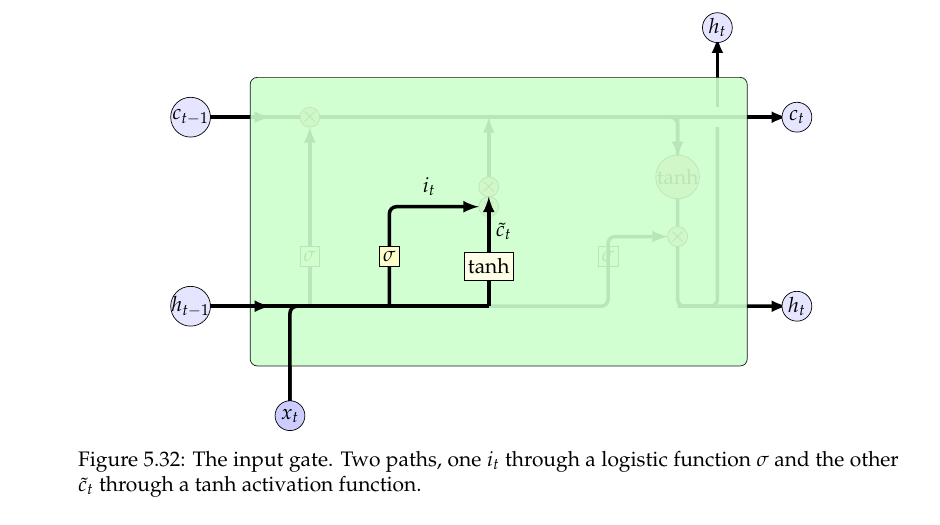

La Figura 5.32 explica el input gate y el $\tilde{c}_t$ cell temporal state.

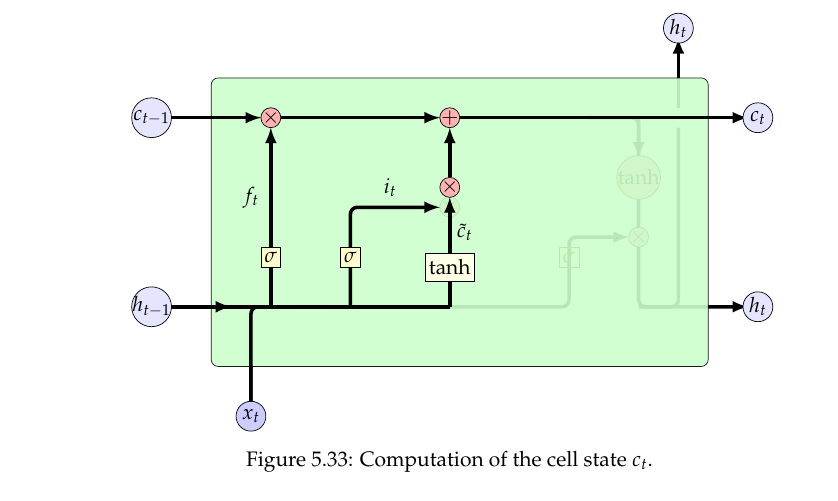



La Figura 5.33 muestra como el output gate y el temporal cell state $\tilde{c}_t$ se combinan para actualizar, median suma, el cell state $c_t$ (ver Ecuacion (1)).

* **output gate**:

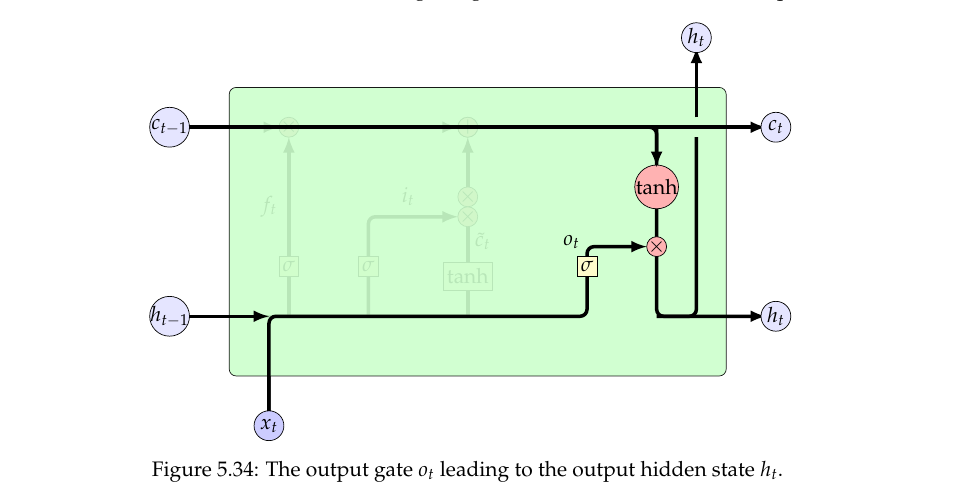

La Figura 5.34 muestra el output gate.


$$ o_t  = \sigma( W_o x_t + U_o h_{t-1} + b_o) $$
$$ h_t = \tanh(c_t) \circ o_t .$$


Hay otros modelos extendidos como el **peephole** introducido por Gers and Schimdhuber 2000. Para esto lo refiero a las notas.


## Backpropagation:
De nuevo la funcion objetivo, que aca llamamos $J$ es una suma de funciones objetivos por cada instancia de tiempo.


$$J = \frac{1}{T} \sum_{t=1}^T J_t .$$

Los pesos los podemos resumir en una lista $W_F = [W_f, U_f, b_f]$ para **forget**, igual para los demas

Tomamos el gradiente con respecto a $W_F$ de $J_k$


\begin{eqnarray}
\frac{\partial J_k}{\partial W_f} &=& \frac{\partial J_k}{\partial h_k}
\frac{\partial h_k}{\partial c_k} \frac{\partial c_k}{\partial c_{k-1}}
\cdots  \frac{\partial c_2}{c_1} \frac{\partial c_1}{\partial W_F} \\
&=& \frac{\partial J_k}{\partial h_k} \prod_{t=k}^2 \frac{\partial c_t}{\partial c_{t-1}} \frac{\partial c_1}{\partial W}
\end{eqnarray}

Este producto ya lo vimos anteriormente (Apendice A de las notas).

Nos enfocamos en
$$\prod_{t=k}^2 \frac{\partial c_t}{\partial c_{t-1}} .$$

Tomemos un factor generico


\begin{eqnarray}
\frac{\partial c_t}{\partial c_{t-1}} &=& \frac{\partial}{\partial c_{t-1}}
\left [ c_{t-1} \circ f_t + i_t \circ \tilde{c}_t  \right ] \\
&=& \frac{\partial c_{t-1}}{\partial c_{t-1}} \circ f_t + c_{t-1} \circ \frac{\partial f_t}{\partial c_{t-1}} + \frac{\partial i_t}{\partial c_{t-1}} \tilde{c}_r + i_t \circ \frac{\partial \tilde{c}_t}{\partial c_{t-1}} \tag{2}
\end{eqnarray}

Analizamos los cuatro terminos de arriba, uno-por-uno.


* $$\frac{\partial f_t}{\partial c_{t-1}}$$. Recordemos las Ecuaciones del
forget (0)

$$f_t = \sigma(W_f x_t + U_f h_{t-1} + b_f) = \sigma[ W_f x_t + U_f \tanh(c_{t-1} \circ o_{t-1}) + b_f] .$$
si llamamos $z=W_f x_t + U_f + b_f$, y con la regla de la cadena.

$$\frac{\partial f_t}{\partial c_{t-1}} = \sigma'(z) U_f \tanh'(c_{t-1} \circ o_{t-1}) \circ  ( I \circ o_{t-1})  .$$

Usamos

$$ I = \frac{\partial c_{t-1}}{\partial c_{t-1}}.$$

Unos datos que vamos a necesitar para el analisis:


\begin{eqnarray}
0 \le \sigma'(z) \le 0.25 \\
0 \le \tanh'(z) \le 1 \\
0 \lt o_{t-1} \le 1
\end{eqnarray}